<h3>Mission 1 : Explorer les Données (Débutant)</h3>

In [47]:
# Charger et afficher les 5 premières lignes
import pandas as pd

df = pd.read_csv("game_data_complete.csv")
df.head()

,Date,ID_Joueur,Temps_Jeu,Victoires,Achats_Objets,Satisfaction,Région,Serveur,Latitude,Longitude
0,2023-01-07,1943,100.913289,1,0,71.3,OC,Stable,30.432320,96.947262
1,2023-01-20,1943,103.048186,1,50,75.9,EU,Stable,5.541137,-89.395196
2,2023-01-29,1943,176.132234,1,50,86.4,AS,Stable,-54.947640,-37.501899
3,2023-01-15,1943,94.473477,0,0,94.6,AF,Stable,-66.108038,-162.469859
4,2023-01-11,1943,193.236652,3,50,55.9,AF,Stable,-34.836281,-134.227974


In [48]:
# Colonnes avec valeurs manquantes et proportions
df.isnull().sum()/len(df)

Date             0.0000
ID_Joueur        0.0000
Temps_Jeu        0.0500
Victoires        0.0000
Achats_Objets    0.0000
Satisfaction     0.0500
Région           0.2116
Serveur          0.0000
Latitude         0.0000
Longitude        0.0000
dtype: float64

In [49]:
# Compter le nombre unique de joueurs
df["ID_Joueur"].nunique()

500

In [50]:
# Statistiques globales (moyenne, min, max)
df.describe(include='all')


,Date,ID_Joueur,Temps_Jeu,Victoires,Achats_Objets,Satisfaction,Région,Serveur,Latitude,Longitude
count,15000,15000.000000,14250.000000,15000.000000,15000.000000,14250.000000,11826,15000,15000.000000,15000.000000
unique,30,NaN,NaN,NaN,NaN,NaN,5,3,NaN,NaN
top,2023-01-17,NaN,NaN,NaN,NaN,NaN,EU,Stable,NaN,NaN
freq,553,NaN,NaN,NaN,NaN,NaN,2398,12066,NaN,NaN
mean,NaN,1494.598000,120.235668,1.139267,54.273333,75.008926,NaN,NaN,0.142723,-0.623209
std,NaN,291.007357,30.038566,1.059975,112.281992,14.321214,NaN,NaN,52.012019,103.976793
min,NaN,1001.000000,30.000000,0.000000,0.000000,50.000000,NaN,NaN,-89.958798,-179.912479
25%,NaN,1234.750000,99.957081,0.000000,0.000000,62.800000,NaN,NaN,-45.112024,-91.142225
50%,NaN,1501.500000,120.196449,1.000000,0.000000,75.000000,NaN,NaN,0.531799,-0.668055
75%,NaN,1741.750000,140.641696,2.000000,50.000000,87.500000,NaN,NaN,44.547058,89.220585


In [51]:
# Trouver les jours où les serveurs sont hors ligne
offline_days = df[df["Serveur"].str.lower()=="hors-ligne"]["Date"].unique()
offline_days

array(['2023-01-24', '2023-01-01', '2023-01-23', '2023-01-04',
       '2023-01-30', '2023-01-11', '2023-01-03', '2023-01-15',
       '2023-01-19', '2023-01-28', '2023-01-02', '2023-01-22',
       '2023-01-21', '2023-01-12', '2023-01-20', '2023-01-16',
       '2023-01-29', '2023-01-17', '2023-01-05', '2023-01-13',
       '2023-01-07', '2023-01-25', '2023-01-06', '2023-01-18',
       '2023-01-14', '2023-01-10', '2023-01-26', '2023-01-09',
       '2023-01-27', '2023-01-08'], dtype=object)

In [52]:
# Filtrer les données pour ces jours et analyser impact sur les achats
df_offline = df[df["Date"].isin(offline_days)]
df_offline["Achats_Objets"].describe()

count    15000.000000
mean        54.273333
std        112.281992
min          0.000000
25%          0.000000
50%          0.000000
75%         50.000000
max        500.000000
Name: Achats_Objets, dtype: float64

<h3>Mission 2 : Analyse des Joueurs Actifs (Intermédiaire)</h3>

In [53]:
# Temps total de jeu par joueur
total_temps = df.groupby("ID_Joueur")["Temps_Jeu"].sum()
total_temps.head()

ID_Joueur
1001    3300.960547
1002    3349.950988
1003    3641.683367
1005    3280.134835
1006    3448.598282
Name: Temps_Jeu, dtype: float64

In [54]:
# Les 5 joueurs les plus actifs
total_temps.sort_values(ascending=False).head(5)

ID_Joueur
1561    3995.501446
1517    3976.710036
1695    3974.456850
1483    3943.158482
1578    3907.477029
Name: Temps_Jeu, dtype: float64

In [55]:
# Joueurs avec satisfaction < 60
df[df["Satisfaction"]<60]["ID_Joueur"].unique()

array([1943, 1822, 1653, 1182, 1236, 1695, 1722, 1973, 1772, 1608, 1129,
       1146, 1468, 1839, 1523, 1892, 1751, 1511, 1126, 1123, 1049, 1954,
       1786, 1518, 1540, 1823, 1573, 1396, 1401, 1799, 1351, 1276, 1662,
       1266, 1999, 1456, 1977, 1078, 1561, 1991, 1069, 1298, 1975, 1005,
       1590, 1734, 1952, 1646, 1015, 1208, 1394, 1152, 1735, 1295, 1879,
       1368, 1980, 1102, 1856, 1478, 1327, 1888, 1575, 1149, 1557, 1780,
       1249, 1288, 1998, 1800, 1647, 1283, 1533, 1920, 1985, 1066, 1376,
       1197, 1032, 1941, 1103, 1100, 1274, 1109, 1749, 1239, 1817, 1294,
       1588, 1194, 1450, 1260, 1763, 1045, 1355, 1286, 1617, 1187, 1597,
       1538, 1077, 1683, 1874, 1057, 1818, 1863, 1108, 1509, 1916, 1494,
       1483, 1019, 1972, 1313, 1395, 1314, 1460, 1063, 1719, 1440, 1432,
       1665, 1651, 1022, 1128, 1496, 1403, 1766, 1891, 1117, 1284, 1836,
       1881, 1332, 1229, 1833, 1101, 1192, 1002, 1716, 1441, 1487, 1748,
       1350, 1373, 1730, 1840, 1893, 1099, 1072, 15

In [56]:
# Top 10 joueurs + ajout colonne Statut
top10 = total_temps.sort_values(ascending=False).head(10).index
df["Statut"] = "Normal"
df.loc[df["ID_Joueur"].isin(top10) & (df["Temps_Jeu"]>4000),"Statut"] = "VIP"
df.loc[df["Satisfaction"]<60,"Statut"] = "Risque"
df[["ID_Joueur","Temps_Jeu","Satisfaction","Statut"]].head(10)

,ID_Joueur,Temps_Jeu,Satisfaction,Statut
0,1943,100.913289,71.3,Normal
1,1943,103.048186,75.9,Normal
2,1943,176.132234,86.4,Normal
3,1943,94.473477,94.6,Normal
4,1943,193.236652,55.9,Risque
5,1943,133.113803,NaN,Normal
6,1943,122.761654,66.0,Normal
7,1943,134.287211,77.3,Normal
8,1943,195.897832,55.0,Risque
9,1943,90.192210,85.8,Normal


<h3>Mission 3 : Visualisation des Performances Régionales (Avancé)</h3>

<Axes: title={'center': 'Ventes Totales par Région'}, xlabel='Région'>

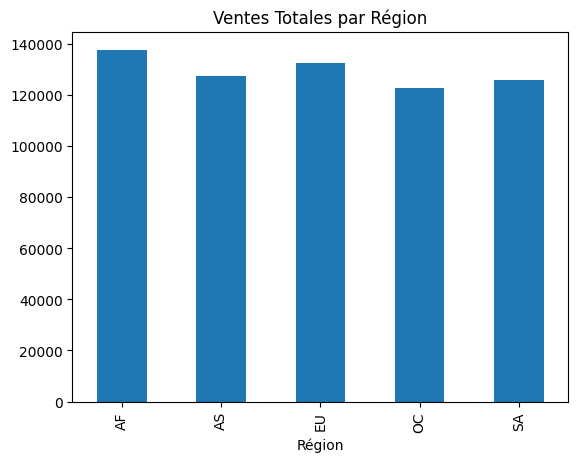

In [57]:
# Graphique ventes totales par région
df.groupby("Région")["Achats_Objets"].sum().plot(kind='bar', title="Ventes Totales par Région")

<Axes: title={'center': 'Statut Serveurs par Région'}, xlabel='Région'>

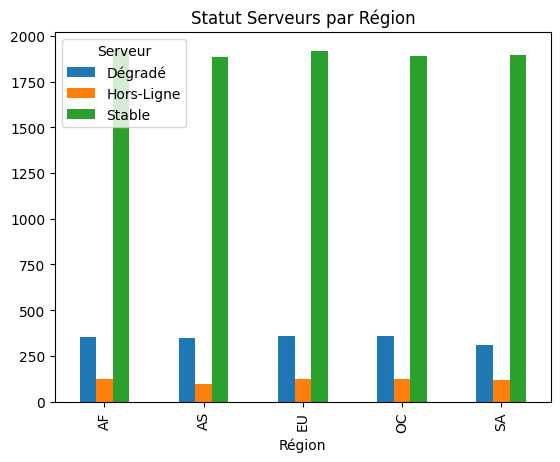

In [58]:
# Performances serveurs par région (count par statut)
df.groupby(["Région","Serveur"]).size().unstack().plot(kind='bar', title="Statut Serveurs par Région")

Text(0.5, 1.0, 'Positions + Achats Moyens (approximatif)')

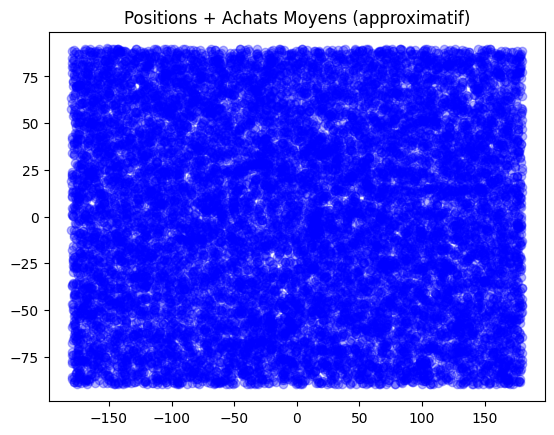

In [59]:
# Carte géographique (approximation en scatter plot sur lat/long)
import matplotlib.pyplot as plt

region_means = df.groupby("Région")["Achats_Objets"].mean().reset_index()
fig, ax = plt.subplots()
ax.scatter(df["Longitude"], df["Latitude"], c='blue', alpha=0.3)
ax.set_title("Positions + Achats Moyens (approximatif)")

<h3>Mission 4 : Prédiction des Dépenses (Expert)</h3>

In [60]:
# Régression linéaire (simple exemple)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df[["Temps_Jeu","Victoires"]].fillna(0)
y = df["Achats_Objets"].fillna(0)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
model_lr = LinearRegression().fit(X_train,y_train)
pred = model_lr.predict(X_test)
r2_score(y_test, pred)

-0.0003515418533168724

In [61]:
# Comparer plusieurs modèles (Arbre, SVM)
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

dt = DecisionTreeRegressor().fit(X_train,y_train)
svm = SVR().fit(X_train,y_train)
print("LR:",r2_score(y_test,model_lr.predict(X_test)))
print("DT:",r2_score(y_test,dt.predict(X_test)))
print("SVM:",r2_score(y_test,svm.predict(X_test)))

LR: -0.0003515418533168724
DT: -1.1191175457924238
SVM: -0.23911439436296722


<h3>Mission 5 : Détection d’Anomalies</h3>

In [62]:
# Détection d’anomalies simple
t_mean,t_std = df["Temps_Jeu"].mean(),df["Temps_Jeu"].std()
v_mean,v_std = df["Victoires"].mean(),df["Victoires"].std()

anomalies = df[(df["Temps_Jeu"]>t_mean+3*t_std)|(df["Victoires"]>v_mean+3*v_std)]
anomalies.head()

,Date,ID_Joueur,Temps_Jeu,Victoires,Achats_Objets,Satisfaction,Région,Serveur,Latitude,Longitude,Statut
383,2023-01-20,1468,213.530434,1,50,55.5,EU,Hors-Ligne,-36.998195,-75.115835,Risque
1408,2023-01-19,1105,221.321488,2,0,94.8,AS,Stable,62.253194,28.169428,Normal
1886,2023-01-05,1888,214.733138,0,0,64.7,NaN,Stable,39.011141,-138.386612,Normal
4498,2023-01-28,1099,221.333047,0,50,87.0,NaN,Stable,-59.107831,-153.430985,Normal
4624,2023-01-29,1290,218.632836,3,50,84.8,NaN,Stable,-52.148191,109.596935,Normal


In [63]:
# Joueurs suspects
suspects = anomalies["ID_Joueur"].unique()
suspects

array([1468, 1105, 1888, 1099, 1290, 1304, 1301, 1950, 1895, 1118, 1808,
       1530, 1159, 1626, 1711, 1107], dtype=int64)

<h3>Mission 6 : Optimisation de l’Économie Virtuelle</h3>

In [64]:
# Joueurs dépensant régulièrement vs non
player_spend = df.groupby("ID_Joueur")["Achats_Objets"].apply(lambda x: (x>0).sum())
regulars = player_spend[player_spend>5].index
non_spenders = player_spend[player_spend==0].index
regulars, non_spenders

(Index([1001, 1002, 1003, 1005, 1006, 1008, 1010, 1012, 1013, 1014,
        ...
        1978, 1980, 1985, 1986, 1989, 1991, 1993, 1995, 1998, 1999],
       dtype='int64', name='ID_Joueur', length=496),
 Index([], dtype='int64', name='ID_Joueur'))

In [65]:
# Segmentation (ex: basé sur moyenne des achats)
seg = df.groupby("ID_Joueur")["Achats_Objets"].mean()
df["Segment"] = df["ID_Joueur"].apply(lambda x: "High" if seg[x]>50 else "Low")
df[["ID_Joueur","Achats_Objets","Segment"]].head()

,ID_Joueur,Achats_Objets,Segment
0,1943,0,High
1,1943,50,High
2,1943,50,High
3,1943,0,High
4,1943,50,High
